In [28]:
import imp
import uproot
import coffea
from coffea import hist
import numpy as np
import datasets
import seutils

%matplotlib inline
import matplotlib.pyplot as plt

## Initialize the datasets

In [29]:
ttjets = datasets.init_ttjets_datasets()
qcd = datasets.init_qcd_datasets()
wjets = datasets.init_wjets_datasets()
zjets = datasets.init_zjets_datasets()

Cache some events. We can't store all events in memory, but for testing it's convenient to have at least some events easy to access. From here on out, if use_cache == True, we're using this limited set of events for the sake of developing faster.

In [30]:
cache_branches = [b'JetsAK15', b'JetsAK15_softDropMass', b'TriggerPass', b'MET', b'METPhi',]
# For qcd and ttjets 1 file contain more than enough events
for dataset in ttjets + qcd:
    dataset.cache_branches(cache_branches, n_files=1)
# For wjets and zjets we need a little more files for a reasonable test set
for dataset in wjets:
    dataset.cache_branches(cache_branches, n_files=2)
for dataset in zjets:
    dataset.cache_branches(cache_branches, n_files=4)

   INFO:2020-06-05 14:28:05:datasets:172 Cached ~3.2 Mb (4946 entries, 5 branches)


   INFO:2020-06-05 14:28:06:datasets:172 Cached ~3.1 Mb (4826 entries, 5 branches)


   INFO:2020-06-05 14:28:08:datasets:172 Cached ~15.2 Mb (23932 entries, 5 branches)


   INFO:2020-06-05 14:28:10:datasets:172 Cached ~10.2 Mb (13177 entries, 5 branches)


   INFO:2020-06-05 14:28:11:datasets:172 Cached ~8.5 Mb (10883 entries, 5 branches)


   INFO:2020-06-05 14:28:12:datasets:172 Cached ~1.3 Mb (1597 entries, 5 branches)


   INFO:2020-06-05 14:28:18:datasets:172 Cached ~33.5 Mb (42699 entries, 5 branches)


   INFO:2020-06-05 14:28:24:datasets:172 Cached ~48.4 Mb (80000 entries, 5 branches)


   INFO:2020-06-05 14:28:30:datasets:172 Cached ~51.3 Mb (80000 entries, 5 branches)


   INFO:2020-06-05 14:28:39:datasets:172 Cached ~43.5 Mb (60000 entries, 5 branches)


   INFO:2020-06-05 14:28:48:datasets:172 Cached ~59.7 Mb (80000 entries, 5 branches)


   INFO:2020-06-05 14:28:57:datasets:172 Cached ~60.0 Mb (80000 entries, 5 branches)


   INFO:2020-06-05 14:29:00:datasets:172 Cached ~13.5 Mb (18000 entries, 5 branches)


   INFO:2020-06-05 14:29:04:datasets:172 Cached ~22.5 Mb (30000 entries, 5 branches)


   INFO:2020-06-05 14:29:15:datasets:172 Cached ~31.6 Mb (42000 entries, 5 branches)


   INFO:2020-06-05 14:29:20:datasets:172 Cached ~31.6 Mb (42000 entries, 5 branches)


   INFO:2020-06-05 14:29:25:datasets:172 Cached ~32.2 Mb (42940 entries, 5 branches)


   INFO:2020-06-05 14:29:27:datasets:172 Cached ~12.0 Mb (16000 entries, 5 branches)


   INFO:2020-06-05 14:29:31:datasets:172 Cached ~17.9 Mb (24000 entries, 5 branches)


   INFO:2020-06-05 14:29:46:datasets:172 Cached ~94.1 Mb (156056 entries, 5 branches)


   INFO:2020-06-05 14:29:56:datasets:172 Cached ~62.8 Mb (103601 entries, 5 branches)


   INFO:2020-06-05 14:30:10:datasets:172 Cached ~85.5 Mb (133144 entries, 5 branches)


   INFO:2020-06-05 14:30:12:datasets:172 Cached ~10.0 Mb (13883 entries, 5 branches)


   INFO:2020-06-05 14:30:14:datasets:172 Cached ~6.2 Mb (8295 entries, 5 branches)


   INFO:2020-06-05 14:30:18:datasets:172 Cached ~26.4 Mb (34993 entries, 5 branches)


   INFO:2020-06-05 14:30:22:datasets:172 Cached ~20.6 Mb (27195 entries, 5 branches)


   INFO:2020-06-05 14:30:29:datasets:172 Cached ~41.2 Mb (54172 entries, 5 branches)


   INFO:2020-06-05 14:30:48:datasets:172 Cached ~157.4 Mb (259978 entries, 5 branches)


   INFO:2020-06-05 14:31:10:datasets:172 Cached ~192.1 Mb (302793 entries, 5 branches)


   INFO:2020-06-05 14:31:11:datasets:172 Cached ~0.0 b (0 entries, 5 branches)


   INFO:2020-06-05 14:31:20:datasets:172 Cached ~68.8 Mb (93720 entries, 5 branches)


   INFO:2020-06-05 14:31:27:datasets:172 Cached ~31.0 Mb (41600 entries, 5 branches)


   INFO:2020-06-05 14:31:33:datasets:172 Cached ~38.8 Mb (51548 entries, 5 branches)


   INFO:2020-06-05 14:31:37:datasets:172 Cached ~13.5 Mb (17926 entries, 5 branches)


In [31]:
ttjets[0].cache

[{b'JetsAK15': <JaggedArrayMethods [[] [] [] ... [TLorentzVector(x=-77.632, y=175.69, z=-153.53, t=299.96)] [] [TLorentzVector(x=-57.324, y=-180.64, z=-160.73, t=256.48)]] at 0x7f1e1a4b0668>,
  b'JetsAK15_softDropMass': <JaggedArray [[] [] [] ... [170.83297710101317] [] [0.0]] at 0x7f1e1a4b06a0>,
  b'TriggerPass': <JaggedArray [[-1 -1 -1 ... 0 0 -1] [-1 -1 -1 ... 0 0 -1] [-1 -1 -1 ... 0 0 -1] ... [-1 -1 -1 ... 0 0 -1] [-1 -1 -1 ... 0 0 -1] [-1 -1 -1 ... 0 0 -1]] at 0x7f1e1a4b06d8>,
  b'MET': array([ 21.06752363,  65.80930644,  37.9411671 , ...,  76.08669101,
          64.40270443, 121.23895121]),
  b'METPhi': array([ 1.25555822,  1.53174342,  0.41242117, ..., -0.77726666,
          2.85783673,  1.16736464])}]

### Signal dataset

In [32]:
signal = datasets.Dataset(
    'mZ300',
    seutils.ls_root('root://cmseos.fnal.gov//store/user/klijnsma/semivis/treemaker_sig_Jun02'),
    is_signal=True
    )

In [33]:
signal.cache_branches(cache_branches, n_files=5)
signal.cache

   INFO:2020-06-05 14:31:40:datasets:172 Cached ~2.9 Mb (3763 entries, 5 branches)


[{b'JetsAK15': <JaggedArrayMethods [[TLorentzVector(x=191.78, y=752.58, z=441.45, t=904.75) TLorentzVector(x=118.75, y=-474.49, z=244.24, t=639.26) TLorentzVector(x=-241.11, y=-25.206, z=-123.95, t=314.17)] [TLorentzVector(x=571.21, y=603.33, z=330.5, t=952.93) TLorentzVector(x=-371.22, y=-707.38, z=-687.84, t=1099.9)] [TLorentzVector(x=759.38, y=66.972, z=1022.3, t=1376.5) TLorentzVector(x=-702, y=-31.439, z=4.922, t=744.25)] ... [TLorentzVector(x=307.5, y=385.22, z=-393.41, t=676.64) TLorentzVector(x=-239.66, y=-196.53, z=-264.86, t=425.16) TLorentzVector(x=85.013, y=-148.01, z=-610.62, t=643.08)] [TLorentzVector(x=-438.54, y=-739.51, z=-130, t=922.91) TLorentzVector(x=117.39, y=676.43, z=567.47, t=1049.1)] [TLorentzVector(x=743.92, y=-193.93, z=502.03, t=936.05) TLorentzVector(x=-180.76, y=-272.26, z=-449.72, t=602.39) TLorentzVector(x=-229.91, y=228.22, z=-15.837, t=344.73)]] at 0x7f1e1a3fa390>,
  b'JetsAK15_softDropMass': <JaggedArray [[6.119659909823731 330.67509922883517 151.543

### Make a function to iterate over the backgrounds more easily

These iterators yield `arrays`, which is like the `TTree` per file.

In [34]:
def iterate_bkg(use_cache=True, branches=None, **kwargs):
    """
    Yields arrays from a dataset
    """
    if branches is None: branches = [b'JetsAK15_softDropMass', b'TriggerPass']
    if use_cache: print('Using cached data (limited)')
    for bkgname, bkg in zip(
        [ 'ttjets', 'qcd', 'wjets', 'zjets' ],
        [ ttjets, qcd, wjets, zjets ]
        ):
        for dataset in bkg:
            arrays_iterator = dataset.cache if use_cache else dataset.iterate_branches(branches=branches, **kwargs)
            # Weight takes into account the cross section and the number of events
            weight = dataset.get_weight(use_cache=use_cache)
            for arrays in arrays_iterator:
                yield arrays, weight, dataset, bkgname

In [35]:
def iterate_sig(use_cache=True, branches=None, **kwargs):
    if branches is None: branches = [b'JetsAK15_softDropMass', b'TriggerPass']
    if use_cache: print('Using cached data (limited)')
    arrays_iterator = signal.cache if use_cache else signal.iterate_branches(branches=branches, **kwargs)
    weight = signal.get_weight(use_cache=use_cache)
    for arrays in arrays_iterator:
        yield arrays, weight, signal, 'signal'

## Basic softdrop mass, no cuts

Let's make a basic histogram of the softdrop mass of AK15 jets for signal and background

In [19]:
hist_msd_split = hist.Hist(
    'Count',
    hist.Cat('dataset', 'Dataset'),
    hist.Bin('msd', r'$m_{SD}$ for AK15', 100, 0., 500.)
    )

# Fill the bkg
for arrays, weight, dataset, bkgname in iterate_bkg():
    hist_msd_split.fill(
        dataset = 'total_bkg',
        msd = arrays[b'JetsAK15_softDropMass'].flatten(),
        weight = weight
        )
    hist_msd_split.fill(
        dataset = bkgname,
        msd = arrays[b'JetsAK15_softDropMass'].flatten(),
        weight = weight
        )
    
# Fill the signal
for arrays, weight, dataset, bkgname in iterate_sig():
    hist_msd_split.fill(
        dataset = dataset.name,
        msd = arrays[b'JetsAK15_softDropMass'].flatten(),
        weight = weight
        )

Using cached data (limited)
TTJets_SingleLeptFromTbar_TuneCP5_13TeV-madgraphMLM-pythia8: Match 'TTJets_SingleLeptFromTbar' yields xs 831.8
TTJets_SingleLeptFromTbar_TuneCP5_13TeV-madgraphMLM-pythia8: Found BR: 831.8 x 0.219 = 182.1642 <-- eff xs
TTJets_SingleLeptFromT_TuneCP5_13TeV-madgraphMLM-pythia8: Match 'TTJets_SingleLeptFromT' yields xs 831.8
TTJets_SingleLeptFromT_TuneCP5_13TeV-madgraphMLM-pythia8: Found BR: 831.8 x 0.219 = 182.1642 <-- eff xs
TTJets_DiLept_TuneCP5_13TeV-madgraphMLM-pythia8: Match 'TTJets_DiLept' yields xs 831.8
TTJets_DiLept_TuneCP5_13TeV-madgraphMLM-pythia8: Found BR: 831.8 x 0.105 = 87.339 <-- eff xs
TTJets_HT-600to800_TuneCP5_13TeV-madgraphMLM-pythia8: Match 'TTJets_HT-600to800' yields xs 1.808
TTJets_HT-800to1200_TuneCP5_13TeV-madgraphMLM-pythia8: Match 'TTJets_HT-800to1200' yields xs 0.749
TTJets_HT-1200to2500_TuneCP5_13TeV-madgraphMLM-pythia8: Match 'TTJets_HT-1200to2500' yields xs 0.1315
TTJets_HT-2500toInf_TuneCP5_13TeV-madgraphMLM-pythia8: Match 'TTJet

In [20]:
def plot_msd_basic(hist_msd, ymin=0.1):
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    hist.plot1d(hist_msd, ax=ax)
    ax.set_ylim(ymin)
    ax.set_yscale('log')
    ax.set_ylabel('Cross section')

/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


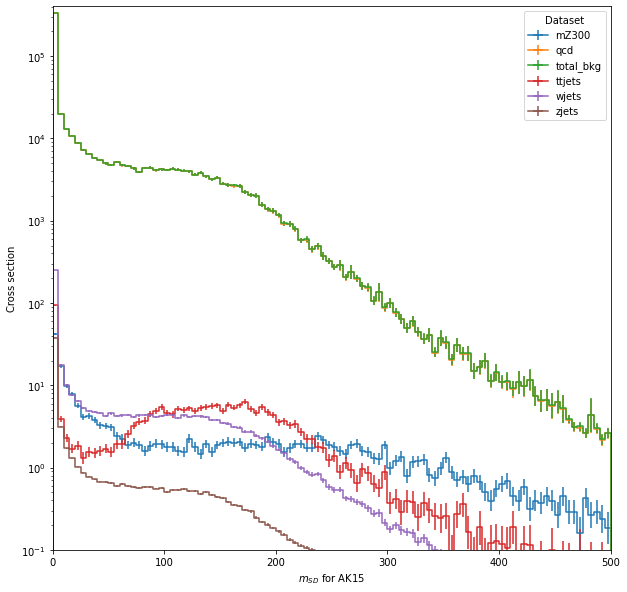

In [21]:
plot_msd_basic(hist_msd_split)

# Apply triggers

In [36]:
trigger_titles = datasets.get_trigger_titles()

In [37]:
def apply_trigger(arrays, triggers):
    """
    Given a structure `arrays` as given by uproot, applies triggers and returns a filtered arrays.
    The branch b'TriggerPass' must be in arrays
    """
    # Indices of the triggers we want to apply
    trigger_indices = np.array([ trigger_titles.index(trigger) for trigger in triggers ])
    trigger_decisions = arrays[b'TriggerPass']
    # Check, per event, if any of the triggers we want equals 1
    passes = (trigger_decisions[:,trigger_indices] == 1).any(axis=1)
    n_total = trigger_decisions.shape[0]
    n_pass = passes.nonzero()[0].shape[0]
    return { k : v[passes] for k, v in arrays.items() }, n_pass, n_total

In [99]:
def filter_zerojet_events(arrays):
    passes = (arrays[b'JetsAK15'].counts >= 1)
    return { k : v[passes] for k, v in arrays.items() }
    
def get_leading_jet(arrays):
    jets = arrays[b'JetsAK15']
    leading_jet = jets[jets.pt.argmax()]
    assert jets.shape[0] == leading_jet.shape[0]
    return leading_jet

def get_leading_jet_branch(arrays):
    arrays[b'JetsAK15_leading'] = get_leading_jet(arrays)

In [100]:
def calculate_mt(arrays, jets_branch=b'JetsAK15_leading'):
    metx = np.cos(arrays[b'METPhi']) * arrays[b'MET']
    mety = np.sin(arrays[b'METPhi']) * arrays[b'MET']
    mete = np.sqrt(metx**2 + mety**2)
    
    jets = arrays[jets_branch]
    jetsx = np.cos(jets.phi) * jets.pt
    jetsy = np.sin(jets.phi) * jets.pt
    jetse = np.sqrt(jets.mass**2 + jets.pt**2)
    
    mt = np.sqrt( (jetse + mete)**2 + (jetsx + metx)**2 + (jetsy + mety)**2 )
    return mt

In [123]:
def apply_preselection(arrays):    
    # Build the preselection
    preselection = (arrays[b'JetsAK15_RT'] > 0.15) & (arrays[b'JetsAK15_MT'] > 500.)
    preselection = preselection.flatten() # Make sure it's at event level, not leading-jet level
    arrays_postpreselection = { k : v[preselection] for k, v in arrays.items() }
    n_pass = arrays_postpreselection[b'JetsAK15_MT'].shape[0]
    return arrays_postpreselection, n_pass

Now here actually applying the triggers and preselection, and saving filtered events in histograms

In [130]:
triggers = [ 'HLT_AK8PFJet450_v', 'HLT_PFHT600_v' ]

hist_msd_raw = hist.Hist(
    'Count',
    hist.Cat('dataset', 'Dataset'),
    hist.Bin('msd', r'$m_{SD}$ for AK15', 100, 0., 500.)
    )
hist_msd_posttrigger = hist.Hist(
    'Count',
    hist.Cat('dataset', 'Dataset'),
    hist.Bin('msd', r'$m_{SD}$ for AK15', 100, 0., 500.)
    )

hist_msd_postpreselection = hist.Hist(
    'Count',
    hist.Cat('dataset', 'Dataset'),
    hist.Bin('msd', r'$m_{SD}$ for AK15', 100, 0., 500.)
    )

# Keep track of trigger efficiency
n_pass = { key : 0 for key in ['ttjets', 'qcd', 'wjets', 'zjets', 'signal']}
n_pass_preselection = { key : 0 for key in ['ttjets', 'qcd', 'wjets', 'zjets', 'signal']}
n_total = { key : 0 for key in ['ttjets', 'qcd', 'wjets', 'zjets', 'signal']}

for arrays, weight, dataset, bkgname in iterate_bkg():
    arrays = filter_zerojet_events(arrays)
    # Calculate the MT and RT
    arrays[b'JetsAK15_leading'] = get_leading_jet(arrays)
    arrays[b'JetsAK15_MT'] = calculate_mt(arrays)
    arrays[b'JetsAK15_RT'] = arrays[b'MET'] / arrays[b'JetsAK15_MT']

    # Fill the histogram before trigger
    hist_msd_raw.fill(
        dataset = 'total_bkg',
        msd = arrays[b'JetsAK15_softDropMass'].flatten(),
        weight = weight
        )
    hist_msd_raw.fill(
        dataset = bkgname,
        msd = arrays[b'JetsAK15_softDropMass'].flatten(),
        weight = weight
        )
    
    arrays_posttrigger, this_n_pass, this_n_total = apply_trigger(arrays, triggers)
    n_pass[bkgname] += this_n_pass
    n_total[bkgname] += this_n_total
    
    hist_msd_posttrigger.fill(
        dataset = 'total_bkg',
        msd = arrays_posttrigger[b'JetsAK15_softDropMass'].flatten(),
        weight = weight
        )
    hist_msd_posttrigger.fill(
        dataset = bkgname,
        msd = arrays_posttrigger[b'JetsAK15_softDropMass'].flatten(),
        weight = weight
        )
    
    #__________________________
    # Preselection
    
    arrays_postpreselection, this_n_pass = apply_preselection(arrays_posttrigger)
    n_pass_preselection[bkgname] += this_n_pass
    
    hist_msd_postpreselection.fill(
        dataset = 'total_bkg',
        msd = arrays_postpreselection[b'JetsAK15_softDropMass'].flatten(),
        weight = weight
        )
    hist_msd_postpreselection.fill(
        dataset = bkgname,
        msd = arrays_postpreselection[b'JetsAK15_softDropMass'].flatten(),
        weight = weight
        )
    
# Fill the signal
for arrays, weight, dataset, bkgname in iterate_sig():
    arrays = filter_zerojet_events(arrays)
    # Calculate the MT and RT
    arrays[b'JetsAK15_leading'] = get_leading_jet(arrays)
    arrays[b'JetsAK15_MT'] = calculate_mt(arrays)
    arrays[b'JetsAK15_RT'] = arrays[b'MET'] / arrays[b'JetsAK15_MT']

    hist_msd_raw.fill(
        dataset = dataset.name,
        msd = arrays[b'JetsAK15_softDropMass'].flatten(),
        weight = weight
        )
    
    arrays_posttrigger, this_n_pass, this_n_total = apply_trigger(arrays, triggers)
    n_pass['signal'] += this_n_pass
    n_total['signal'] += this_n_total
    
    hist_msd_posttrigger.fill(
        dataset = dataset.name,
        msd = arrays_posttrigger[b'JetsAK15_softDropMass'].flatten(),
        weight = weight
        )
    
    arrays_postpreselection, this_n_pass = apply_preselection(arrays_posttrigger)
    n_pass_preselection['signal'] += this_n_pass
    
    hist_msd_postpreselection.fill(
        dataset = dataset.name,
        msd = arrays_postpreselection[b'JetsAK15_softDropMass'].flatten(),
        weight = weight
        )

Using cached data (limited)
Using cached data (limited)


In [133]:
print('Trigger eff:')
for key in n_pass.keys():
    eff = float(n_pass[key]) / n_total[key]
    print(
        'Efficiency for {0:6}: {1:.3f}  ({2}/{3})'
        .format(key, eff, n_pass[key], n_total[key])
        )

Trigger eff:
Efficiency for ttjets: 0.753  (60988/81002)
Efficiency for qcd   : 0.631  (297439/471743)
Efficiency for wjets : 0.495  (101353/204758)
Efficiency for zjets : 0.294  (102348/347676)
Efficiency for signal: 0.675  (2541/3762)


In [134]:
print('Preselection + trigger eff:')
for key in n_pass_preselection.keys():
    eff = float(n_pass_preselection[key]) / n_total[key]
    print(
        'Efficiency for {0:6}: {1:.3f}  ({2}/{3})'
        .format(key, eff, n_pass_preselection[key], n_total[key])
        )

Preselection + trigger eff:
Efficiency for ttjets: 0.107  (8634/81002)
Efficiency for qcd   : 0.015  (7077/471743)
Efficiency for wjets : 0.111  (22735/204758)
Efficiency for zjets : 0.154  (53701/347676)
Efficiency for signal: 0.297  (1116/3762)


/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/uscms_data/d3/klijnsma/miniconda3/envs/condaroot/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


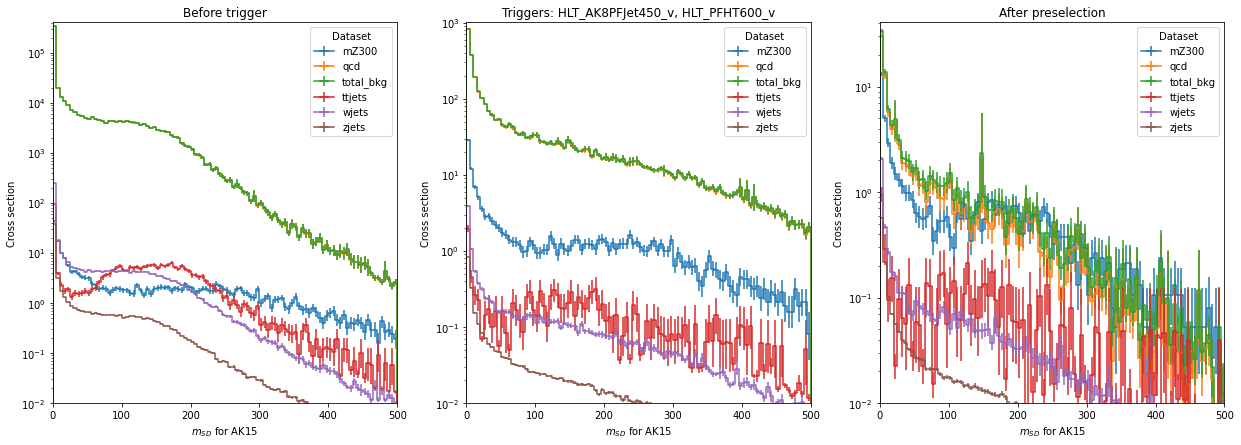

In [129]:
def plot_msd_posttrigger():
    ymin = 0.01
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(21,7))
    ax = axs[0]
    hist.plot1d(hist_msd_raw, ax=ax)
    ax.set_ylim(ymin)
    ax.set_yscale('log')
    ax.set_ylabel('Cross section')
    ax.set_title('Before trigger')
    ax = axs[1]
    hist.plot1d(hist_msd_posttrigger, ax=ax)
    ax.set_ylim(ymin)
    ax.set_yscale('log')
    ax.set_ylabel('Cross section')
    ax.set_title('Triggers: {0}'.format(', '.join(triggers)))
    ax = axs[2]
    hist.plot1d(hist_msd_postpreselection, ax=ax)
    ax.set_ylim(ymin)
    ax.set_yscale('log')
    ax.set_ylabel('Cross section')
    ax.set_title('After preselection')
plot_msd_posttrigger()